parameter in center region


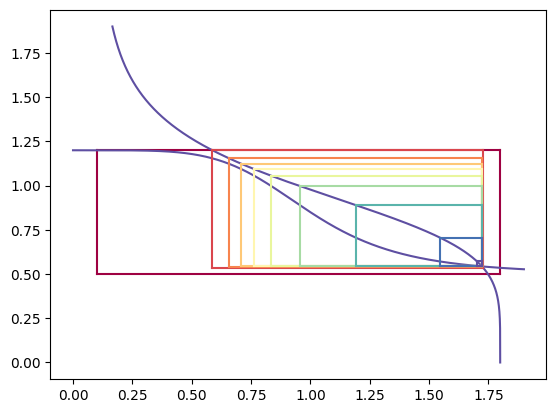

boxy box converged
detected monostability
   AGAINST DSGRN predictions


In [4]:
import numpy as np
import matplotlib.pyplot as plt

cmap = plt.cm.get_cmap('Spectral')

gamma1, ell1, delta1 = 1, .5, .7
gamma2, ell2, delta2 = 1, .1, 1.7

theta1 = 1.#gamma1/(ell1 + delta1/2)
theta2 = 1.#gamma2/(ell2 + delta2/2)

n = 5.

in_center_region = (ell1<gamma1*theta1) and (gamma1*theta1< ell1+delta1) and (ell2<gamma2*theta2) and (gamma2*theta2<ell2+delta2)

if in_center_region:
    print('parameter in center region')
else:
    print('parameter NOT in center region')

H1 = lambda x : ell1 + delta1 /( 1 + (x/theta1)**n)
H2 = lambda x : ell2 + delta2 /( 1 + (x/theta2)**n)



x1_min, x1_max = ell1/gamma1, (ell1 + delta1)/gamma1
x2_min, x2_max = ell2/gamma2, (ell2 + delta2)/gamma2
 
plt.plot([x2_min, x2_max],[x1_min, x1_min],color=cmap(0))
plt.plot([x2_min, x2_min],[x1_min, x1_max],color=cmap(0))
plt.plot([x2_max, x2_max],[x1_min, x1_max],color=cmap(0))
plt.plot([x2_min, x2_max],[x1_max, x1_max],color=cmap(0)) 
    
x_min = min(x1_min, x2_min)
x_max = max(x1_max, x2_max)
xplot = np.linspace(x_min-0.1, x_max+0.1, 1000)
plt.plot(xplot, H1(xplot)/gamma1,color=cmap(1000))
plt.plot(H2(xplot)/gamma2, xplot,color=cmap(1000))


for i in range(1,20):
    x1_min = H1(x2_max)/gamma1
    x1_max = H1(x2_min)/gamma1
    x2_min = H2(x1_max)/gamma2
    x2_max = H2(x1_min)/gamma2
    plt.plot([x2_min, x2_max],[x1_min, x1_min],color=cmap(i*30))
    plt.plot([x2_min, x2_min],[x1_min, x1_max],color=cmap(i*30))
    plt.plot([x2_max, x2_max],[x1_min, x1_max],color=cmap(i*30))
    plt.plot([x2_min, x2_max],[x1_max, x1_max],color=cmap(i*30)) 

plt.savefig('boxy_box')
plt.show()

if abs(-gamma1*x1_min + H1(x2_max))>10**-6 and abs(-gamma1*x1_max + H1(x2_min))>10**-6:
    print('boxy box FAILED to converge')
else:
    print('boxy box converged')

bistability = abs(x1_min - x1_max)>10**-6 and abs(x2_min - x2_max)>10**-6
if bistability:
    print('detected bistability')
else:
    print('detected monostability')
    if in_center_region: 
        print('   AGAINST DSGRN predictions')


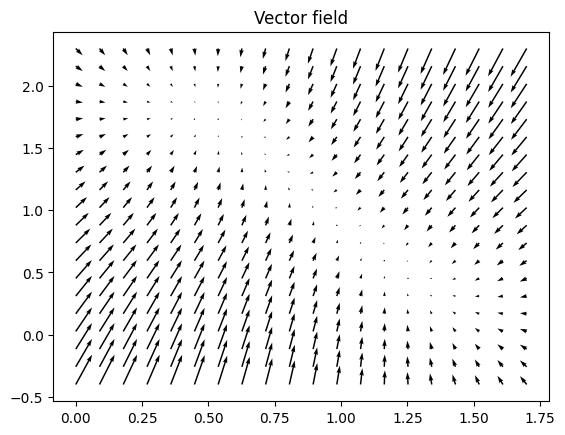

In [56]:
def plot_vector_field():
    factor = 2
    x1_min, x1_max = ell1/gamma1, (ell1 + delta1)/gamma1
    x2_min, x2_max = ell2/gamma2, (ell2 + delta2)/gamma2
    x,y = np.meshgrid(np.linspace(x1_min -0.5, x1_max+0.5,10*factor),np.linspace(x2_min -0.5, x2_max+0.5,10*factor))

    u = - gamma1 * x + H1(y)
    v = - gamma2 * y + H2(x)

    plt.quiver(x,y,u/factor,v/factor)
    plt.title('Vector field')
    plt.show()
    return


#if not bistability and in_center_region:
plot_vector_field()

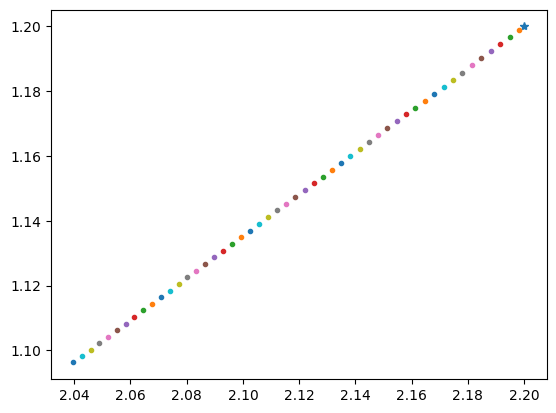

In [38]:
right_hand_side = lambda x1x2 : np.array((- gamma1 * x1x2[0] + H1(x1x2[1]), - gamma2 * x1x2[1] + H2(x1x2[0])))

epsilon = 10**-3
euler_step = lambda x1x2 : x1x2 + epsilon * right_hand_side(x1x2)

x1x2 = np.array((2.2, 1.2))
plt.plot(x1x2[0], x1x2[1], '*')
for i in range(100):
    if np.mod(i,2):
        plt.plot(x1x2[0], x1x2[1], '.')
    x1x2 = euler_step(x1x2)
plt.show()

In [39]:
np.array([2.2, 1.2]) + np.array(right_hand_side(np.array(([2.128, 1.5]))))

array([ 0.572, -0.2  ])

In [40]:
print(right_hand_side((x1_min, x2_min)))
print(right_hand_side((x1_min, x2_max)))
print(right_hand_side((x1_max, x2_min)))
print(right_hand_side((x1_max, x2_max)))


[0.7        1.69999921]
[0. 0.]
[0. 0.]
[-0.7        -1.69999921]


In [57]:
print(x1_min, x1_max, x2_min, x2_max)

0.5432233708635574 0.5432233708635827 1.7232163692039726 1.72321636920399


# 1D example of the boxy box

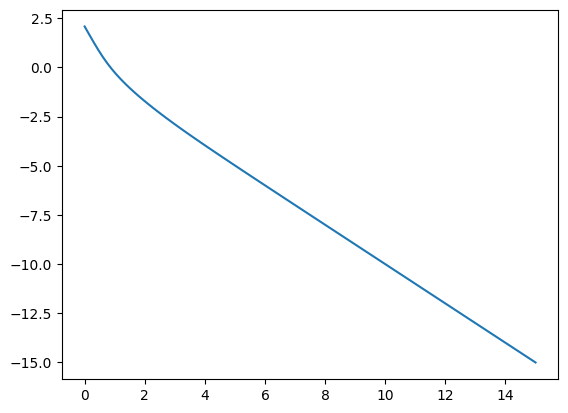

In [57]:
# F(x) = - x + gplus(x) * gminus(x)
gplus = lambda x : 1/(1+np.exp(x)) +  1/(2+np.exp(3 * x))
gminus = lambda x : 2 + 1/(2+np.tanh(x))
F = lambda x : - x + gplus(x) * gminus(x)

xplot = np.linspace(0, 15, 100)
plt.plot(xplot, F(xplot))

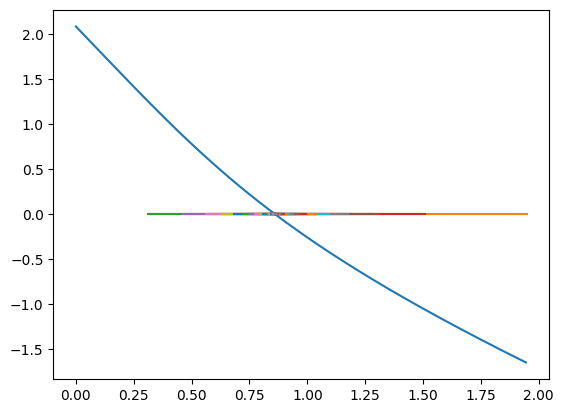

In [58]:
phi = lambda xplus, xminus : (gplus(xplus)*gminus(xminus), gplus(xminus)*gminus(xplus))


xplus, xminus = gplus(0)*gminus(100), gplus(100)*gminus(0)

xplot = np.linspace(xminus, xplus, 200)
plt.plot(xplot, F(xplot))

for i in range(400):
    xplus, xminus = phi(xplus, xminus)
    #print(xplus, xminus)
    plt.plot([xminus, xplus],[0,0]) 
plt.show()

In [59]:
print(xplus, xminus)
print(F(xplus))

0.8605011578547733 0.8605011578547733
4.773959005888173e-15


# 2D, not Toggle Switch

In [146]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator


def plot_2D_box(F, xminus, xplus, ax1, ax2):

    x_corners = np.array((xminus[0], xminus[0], xplus[0], xplus[0], xminus[0]))
    y_corners = np.array((xminus[1], xplus[1], xplus[1], xminus[1], xminus[1]))
    z_corners = F(x_corners, y_corners)
    
    ax1.plot(x_corners, y_corners, 0*z_corners[0])
    ax2.plot(x_corners, y_corners, 0*z_corners[1])
    return


def plot_graph(F, xminus, xplus):
    fig, ax1 = plt.subplots(subplot_kw={"projection": "3d"})

    # Make data.
    X = np.linspace(xminus[0], xplus[0], 50)
    Y = np.linspace(xminus[1], xplus[1], 50)
    X, Y = np.meshgrid(X, Y)
    Z = F(X, Y)[0]

    # Plot the surface.
    surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    
    fig.colorbar(surf, shrink=0.5, aspect=5)

    fig, ax2 = plt.subplots(subplot_kw={"projection": "3d"})

    Z = F(X, Y)[1]

    # Plot the surface.
    surf = ax2.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    return ax1, ax2
    

In [153]:
sigmaplus = lambda x : 1/ ( 1+ np.exp(x))

gplus = lambda x, y : np.array((np.tanh(x)*np.tanh(2+y)+4, +1.5 + np.tanh(x)))
gminus = lambda x, y : np.array((np.tanh(-x)+2, 1+0*y))

F = lambda x, y: - np.array((x,y)) + gplus(x,y) * gminus(x,y)

[4.99750844 2.4993293 ] [5.00310654 2.5       ]
[5.00011279 2.49990875] [5.00011922 2.49990977]
[5.00011625 2.49990922] [5.00011626 2.49990923]
[5.00011626 2.49990923] [5.00011626 2.49990923]


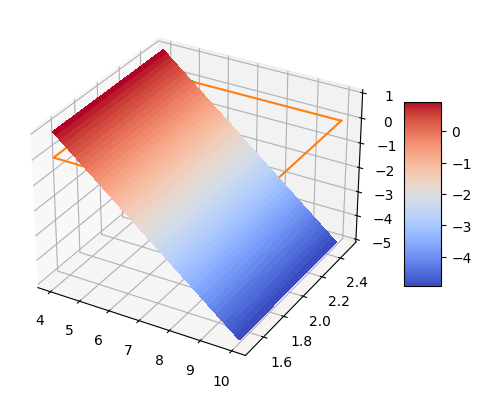

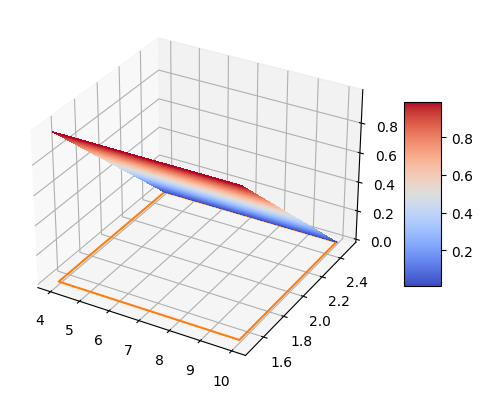

array([4.54392080e-12, 6.43929354e-13])

In [154]:
phi = lambda xplus, xminus : (gplus(xplus[0], xplus[1])*gminus(xminus[0], xminus[1]), gplus(xminus[0], xminus[1])*gminus(xplus[0], xplus[1]))

xplus, xminus = gplus(0, 0)*gminus(100, 100), gplus(100, 100)*gminus(0,0)

ax1, ax2 = plot_graph(F, xminus, xplus)


for i in range(4):
    plot_2D_box(F, xminus, xplus, ax1, ax2)
    xplus, xminus = phi(xplus, xminus)
    print(xplus, xminus)

plt.show()
F(xplus[0], xplus[1])

# EMT, actually actually working!

def EMT:


$$
\begin{cases}
x1dot = -gamma1 * x[0] + Hmin(p12, x[1])*Hmin(p14, x[3])\\

x2dot = -gamma2 * x[1] + Hmin(p23, x[2])*Hplus(p25, x[4])\\

x3dot = -gamma3 * x[2] + Hmin(p36, x[5])*Hplus(p31, x[0])\\

x4dot = -gamma4 * x[3] + Hmin(p45, x[4])\\

x5dot = -gamma5 * x[4] + Hmin(p54, x[3])*Hplus(p52, x[1])*Hplus(p53, x[2])\\

x6dot = -gamma6 * x[5] + Hmin(p63, x[2])
\end{cases}
$$

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import itertools


def Hmin(n, par, x):
    ell, delta, theta = par[:]
    return ell + delta /( 1 + (x/theta)**n)


def H_bound():
    ell, delta, theta = 2.1, 3.4, 1.6
    return np.array((ell, ell+delta))


def Hplus(n, par, x):
    ell, delta, theta = par[:]
    if x == 0:
        return ell
    return ell + delta /( 1 + (theta/x)**n)


# the EMT right hand side

def gpm_func(n, par):
    gplus = lambda x : np.array((1, Hplus(n,par[7,:],x[4]), Hplus(n,par[8,:],x[0]), 1, 
                                 Hplus(n,par[9,:],x[1])*Hplus(n,par[10,:],x[2]), 1))

    gminus = lambda x : np.array((Hmin(n,par[0,:],x[1])*Hmin(n,par[1,:],x[3]), Hmin(n,par[2,:],x[2]), 
                              Hmin(n,par[3,:],x[5]), Hmin(n,par[4,:],x[4]), Hmin(n,par[5,:],x[3]), 
                              Hmin(n,par[6,:],x[2])))
    return gplus, gminus


def F_func(n,par, gamma):
    gplus, gminus = gpm_func(n,par)
    F = lambda x : - gamma * x + gplus(x) * gminus(x)
    return F


def phi_func(n,par, gamma):
    gplus, gminus = gpm_func(n,par)
    phi = lambda xplus, xminus : (gplus(xplus)*gminus(xminus)/gamma, gplus(xminus)*gminus(xplus)/gamma)
    return phi


def convergence(F, xminus, xplus):
    tol = 10**-7
    if np.linalg.norm(xminus-xplus)<tol:
        return True
    zero_corners = 0
    allx = list(itertools.product(*zip(xminus, xplus)))
    
    for i in range(2**6):
        if(np.linalg.norm(F(allx[i])))<tol:
            zero_corners += 1
    
    if zero_corners >= 2:
        return True
    else:
        return False

    
def which_corner(F, xminus, xplus):
    tol = 10**-7
    allx = list(itertools.product(*zip(xminus, xplus)))
    
    for i in range(2**6):
        if(np.linalg.norm(F(allx[i])))<tol:
            print(np.linalg.norm(F(allx[i])))

            
def boxy_box_from_pars(n, par, gamma, maxiter = 180):
    # define the mapping
    
    gplus, gminus = gpm_func(n, par)
    phi = phi_func(n, par, gamma)
    F = F_func(n, par, gamma)
    
    # set starting point
    xzero = np.zeros(6)
    x100 = 100 + xzero
    xplus, xminus = gplus(xzero)*gminus(x100)/gamma, gplus(x100)*gminus(xzero)/gamma
    
    # the iterations
    iter = 0
    remainder = np.array([])
    while (not convergence(F, xminus, xplus)) and (iter < maxiter):
        xplus_new, xminus_new = phi(xplus, xminus)
        remainder = np.append(remainder, np.linalg.norm(xplus-xplus_new)+np.linalg.norm(xminus_new-xminus))
        iter += 1
        xplus, xminus = xplus_new, xminus_new
    
    # wrapping of results
    if iter == maxiter:
        success = False
    else:
        success = True
    
    return success, xminus, xplus, remainder


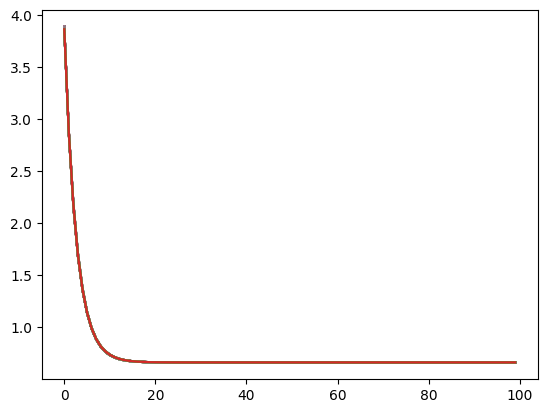

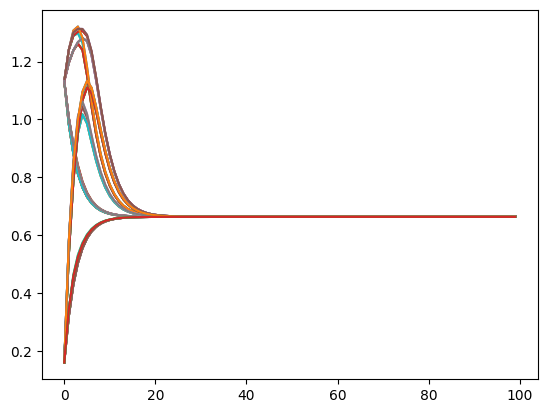

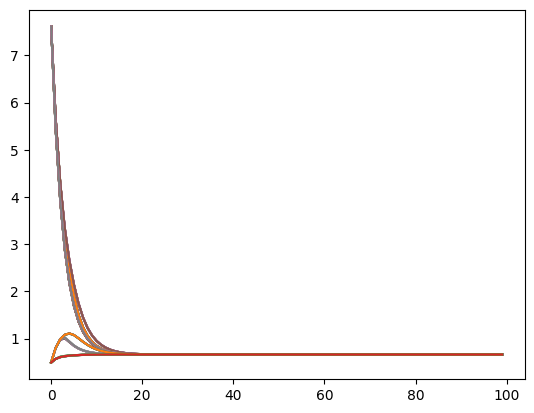

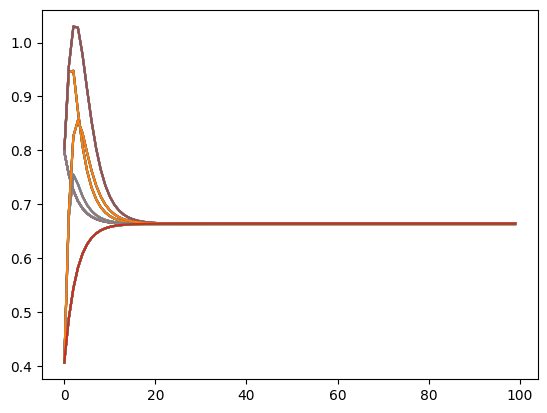

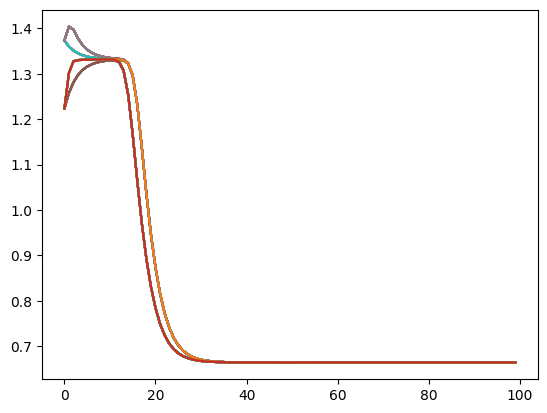

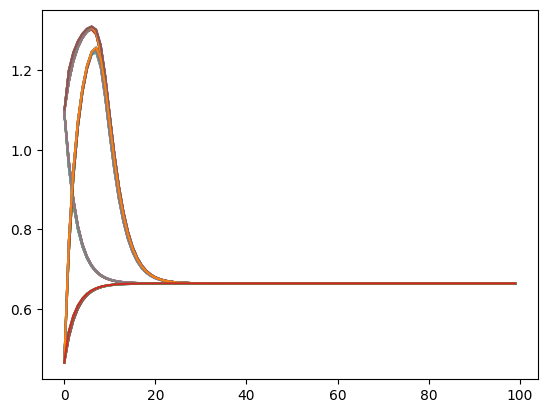

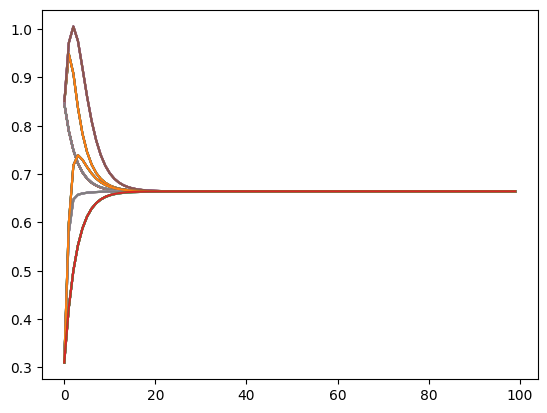

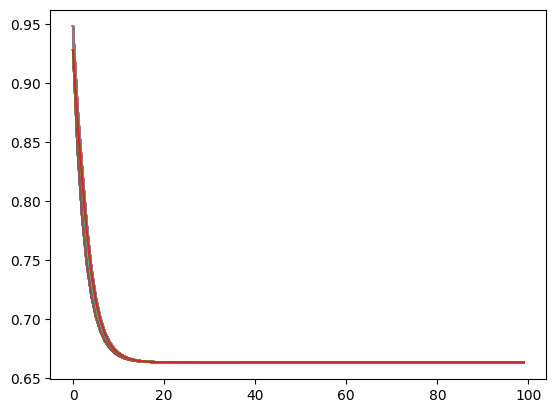

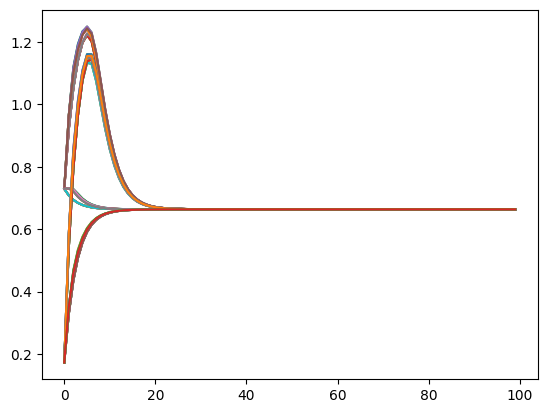

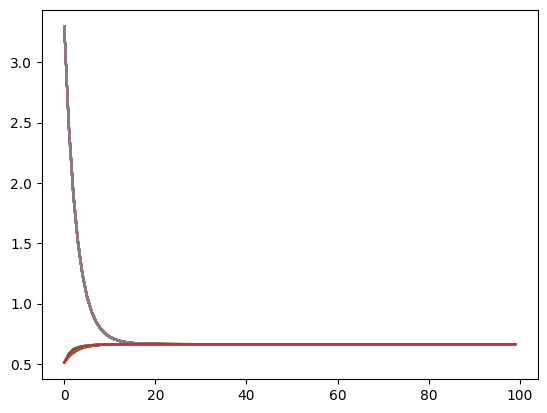

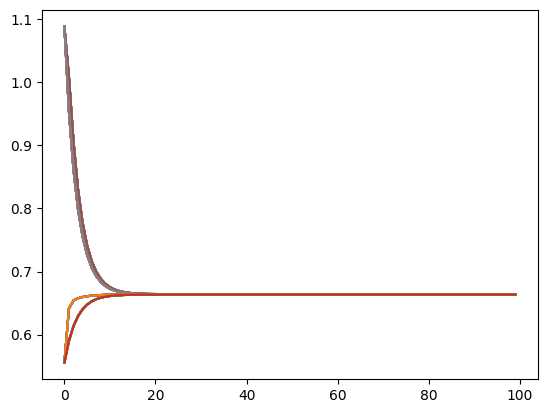

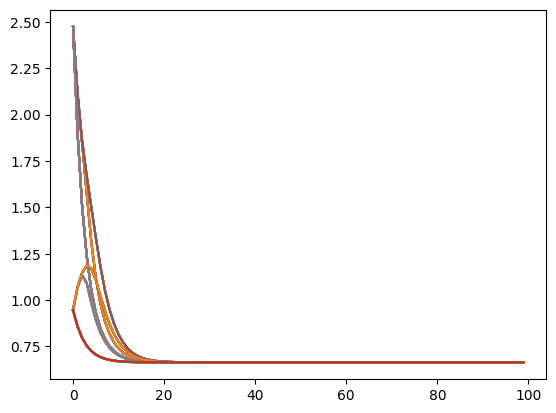

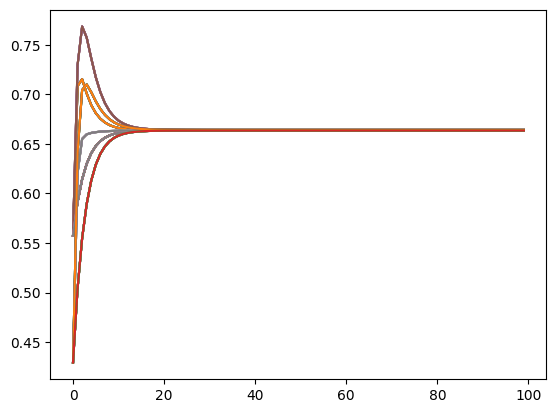

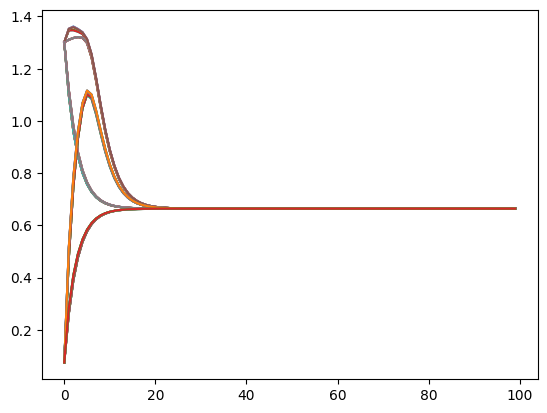

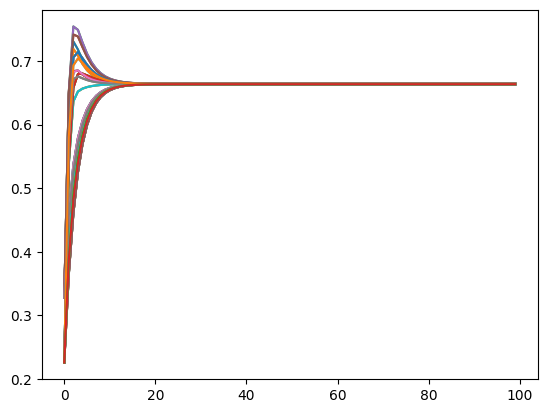

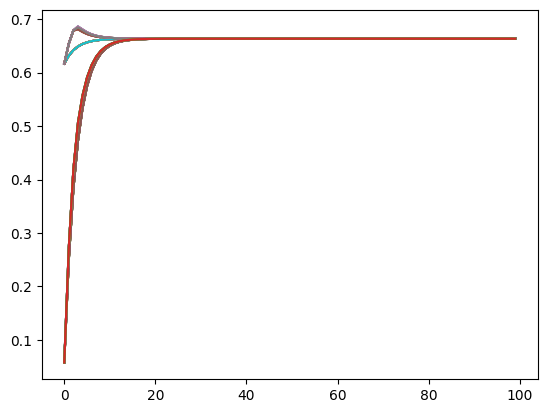

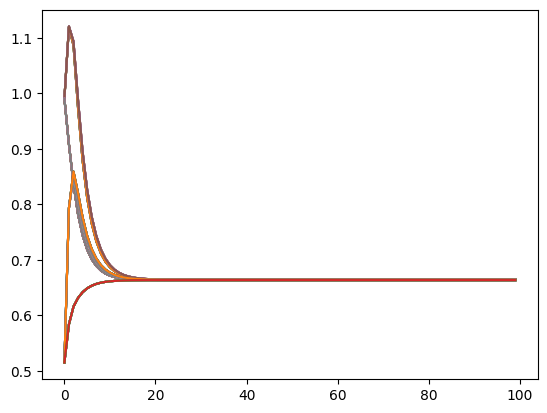

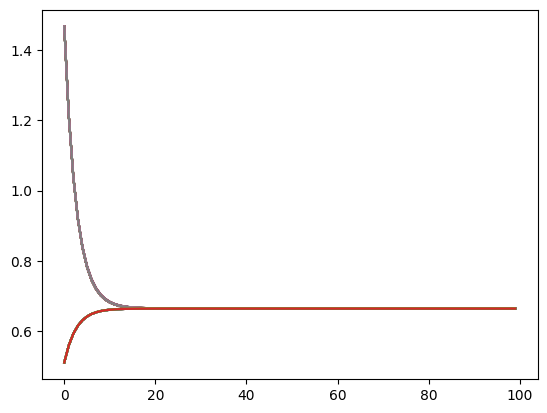

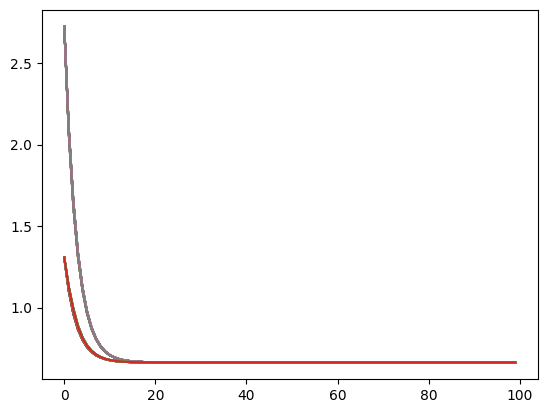

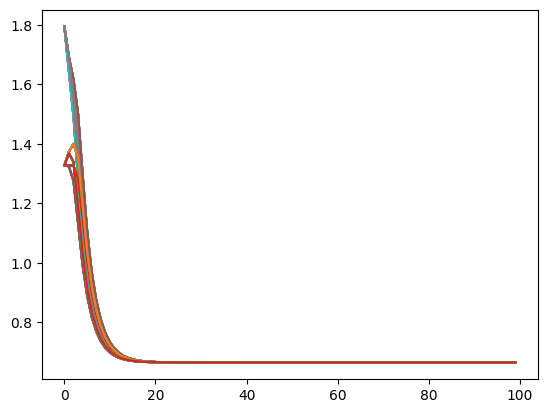

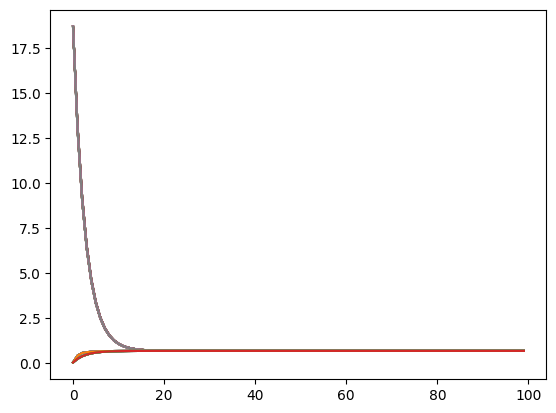

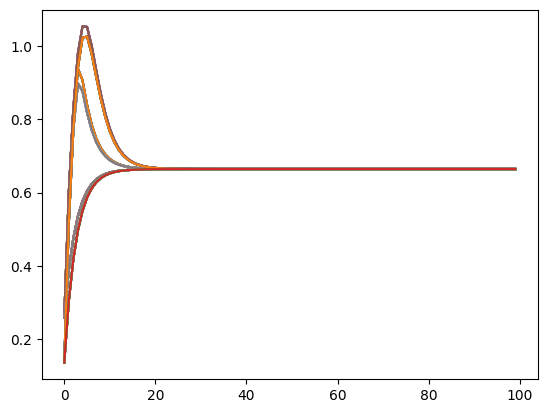

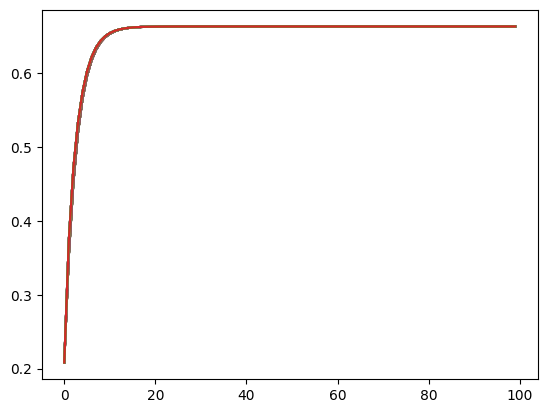

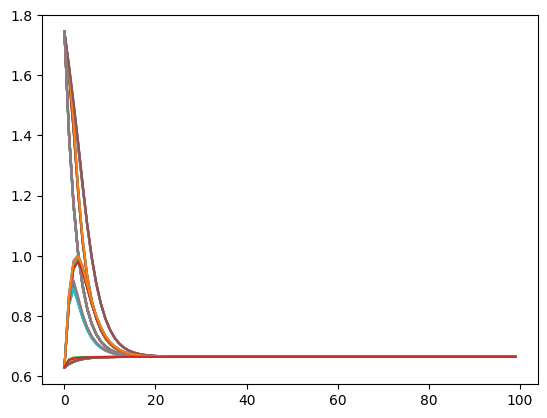

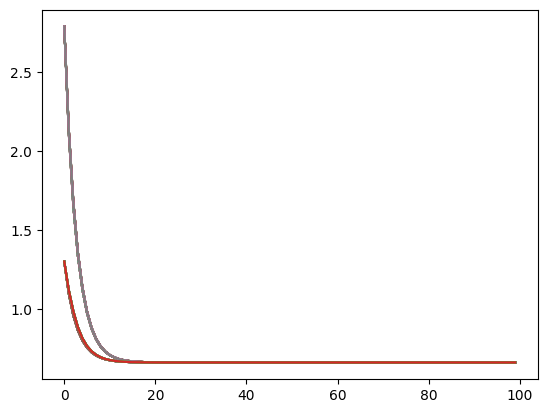

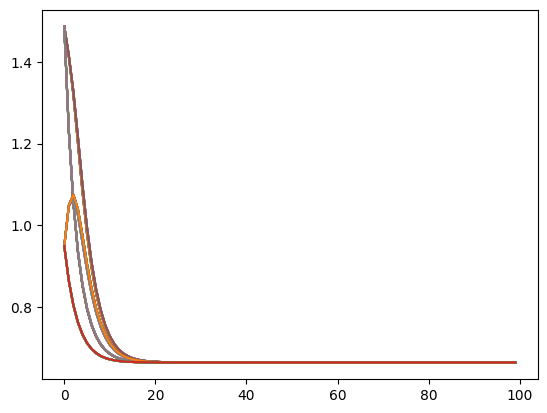

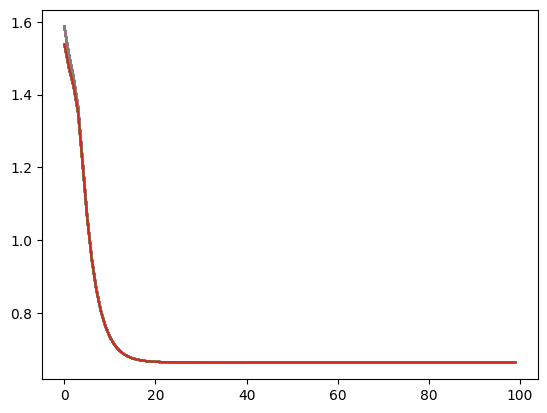

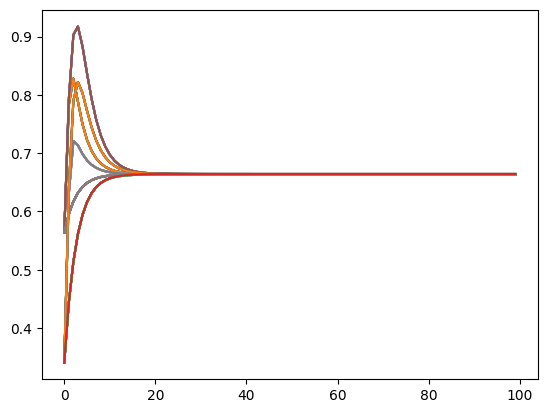

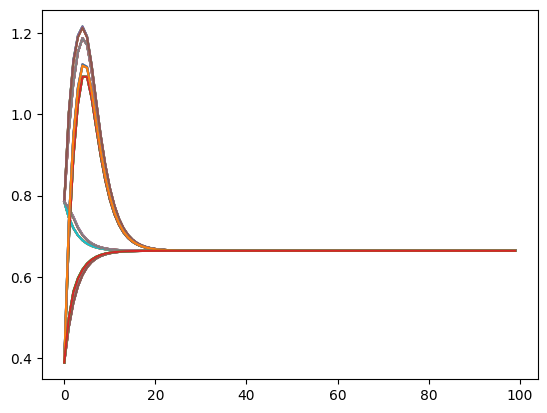

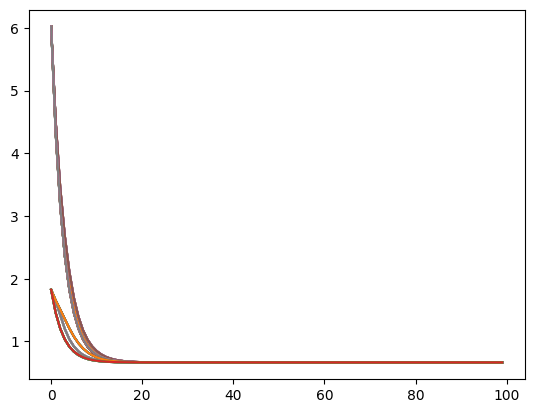

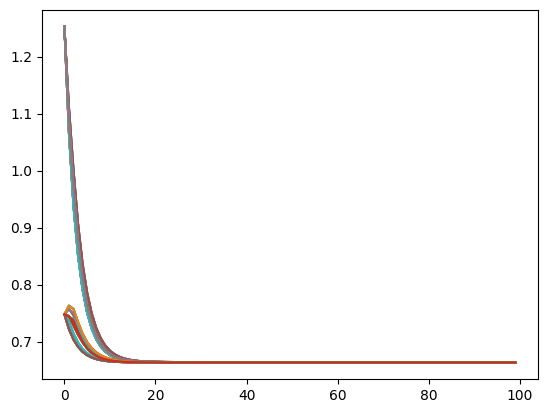

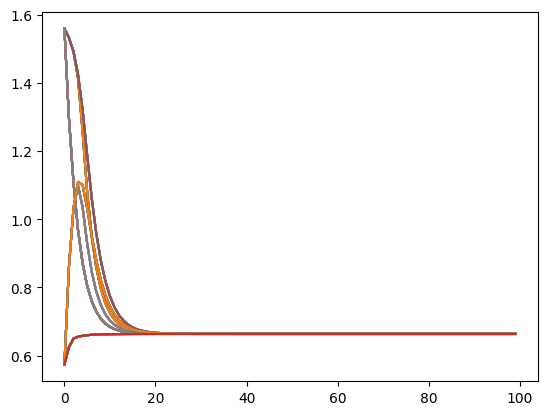

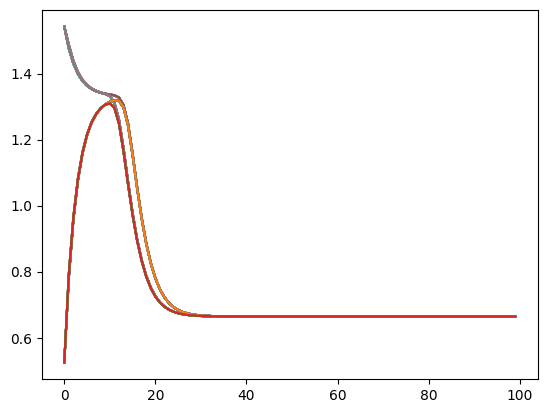

No corner equilibria  33 times out of 1000
Bistability found  263 times out of 1000
not_coplanar found  0 times out of 1000


In [34]:


failed_iters = 0
bistability = 0
n = 15.

not_coplanar = 0

for j in range(1000):
    par =  np.random.random(size=(11,3))
    gamma = np.random.random(size=(6))

    success, xminus, xplus, remainder = boxy_box_from_pars(n, par, gamma)
    
    if not success:
        failed_iters += 1
        #plt.semilogy(remainder[0:40])
        allx = list(itertools.product(*zip(xminus, xplus)))

        for i in range(2**6):
            y = scipy.integrate.odeint(emt_scipy, allx[i], np.linspace(0,50,100))
            if i == 0:
                equilibria = np.array([[y[-1,:]]])
            else:
                equilibria = np.append(equilibria, y[-1,:])
            plt.plot(y[:,1])
        plt.show()
    else:
        
        if np.linalg.norm(xplus-xminus)>0.1:
            bistability += 1
            
print('No corner equilibria ', failed_iters, 'times out of', j+1)
print('Bistability found ', bistability, 'times out of', j+1)
print('not_coplanar found ', not_coplanar, 'times out of', j+1)
#plt.show()

In [3]:
# BISTABILITY
par = np.array([[0.31083692, 0.44001787, 0.12361556],
 [0.89845635, 0.40781653, 0.80216129],
 [0.80106757, 0.86461652, 0.55850467],
 [0.5999459 , 0.04021963, 0.78396149],
 [0.48451338, 0.64948758, 0.02071652],
 [0.23013248, 0.05041278, 0.70678016],
 [0.35816212, 0.70197586, 0.74599264],
 [0.35991109, 0.77460683, 0.21067126],
 [0.65235732, 0.73682137, 0.15477423],
 [0.41255175, 0.2616212 , 0.86915012],
 [0.33021167, 0.59461682, 0.69491723]])
gamma =  np.array([0.15625948, 0.4022569,  0.02298751, 0.678251,   0.70535556, 0.53742348])

n = 10.90  # change of number of equilibria between 10.85 and 10.90
gplus, gminus = gpm_func(n, par)
phi = phi_func(n, par, gamma)
F = F_func(n, par, gamma)

xzero = np.zeros(6) #+ 10**-10
x100 = 100 + xzero
xplus, xminus = gplus(xzero)*gminus(x100)/gamma, gplus(x100)*gminus(xzero)/gamma

iter = 0
maxiter = 80
remainder = np.array((np.linalg.norm(F(xplus))))
while (not (convergence(F, xminus, xplus))) and (iter < maxiter):
    xplus, xminus = phi(xplus, xminus)
    remainder = np.append(remainder, np.linalg.norm(F(xplus)))
    iter += 1
    
which_corner(F, xplus, xminus)
    
print('iters = ', iter)
print('Size of box = ', np.linalg.norm(xplus-xminus))
print('two final norm of F = ', np.linalg.norm(F(xminus)), np.linalg.norm(F(xplus)))
print('at ',xminus, ' and \n', xplus)


1.2824261760745716e-09
1.2824261760745716e-09
1.316984600742064e-09
1.316984600742064e-09
1.2824261760745716e-09
1.2824261760745716e-09
1.316984600742064e-09
1.316984600742064e-09
1.9009759421849884e-09
1.9009759421849884e-09
2.015683666680067e-09
2.015683666680067e-09
1.9009759421849884e-09
1.9009759421849884e-09
2.015683666680067e-09
2.015683666680067e-09
iters =  6
Size of box =  0.9866530646289061
two final norm of F =  2.015683666680067e-09 0.0017507094183057373
at  [ 2.41972349  1.74285923 38.33273137  0.71435705  0.22436743  0.66644301]  and 
 [ 2.41972348  0.75877822 38.33273137  0.71435704  0.15317175  0.66644301]


In [21]:
# strange parameter

par = np.array([[0.84973054, 0.34302064, 0.59501634],
 [0.46827921, 0.72206075, 0.6924138 ],
 [0.54360885, 0.05824959, 0.4946114 ],
 [0.97519702, 0.33945271, 0.41401306],
 [0.2013741,  0.32182249, 0.26553167],
 [0.19624341, 0.31968437, 0.74606408],
 [0.29318171, 0.72472529, 0.41320029],
 [0.92646409, 0.93331863, 0.69357242],
 [0.49879464, 0.15371268, 0.45813408],
 [0.84078276, 0.34089464, 0.82102384],
 [0.18352887, 0.32586043, 0.08913339]])

gamma = np.array([0.59246758, 0.75903788, 0.47852454, 0.502144,   0.62464406, 0.86344328])

success, xminus, xplus, remainder = boxy_box_from_pars(n, par, gamma)

print('Size of box = ', np.linalg.norm(xplus-xminus))

print(xminus, '\n',  xplus)

gplus, gminus = gpm_func(n, par)
phi = phi_func(n, par, gamma)
F = F_func(n, par, gamma)

print(convergence(F, xminus, xplus))

allx = list(itertools.product(*zip(xminus, xplus)))

#for i in range(2**6):
#    print(np.linalg.norm(F(allx[i])))

Size of box =  1.2961213650498453
[1.86343288 0.66415025 1.74482366 1.04103089 0.36625157 0.3395496 ] 
 [0.747605   0.6635165  1.74285774 0.41971846 0.14528704 0.3395496 ]
False


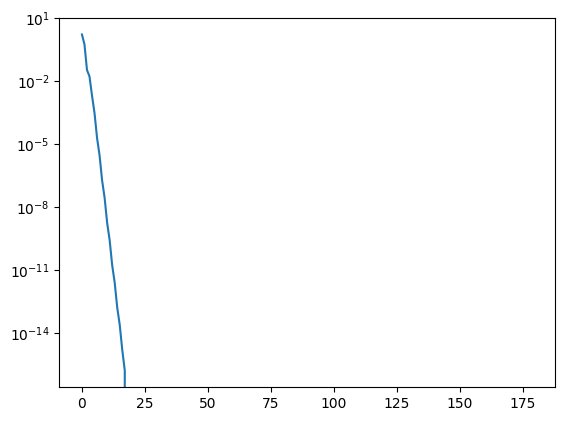

In [23]:
plt.semilogy(remainder)

In [24]:
allx = list(itertools.product(*zip(xminus, xplus)))

min_F = np.linalg.norm(F(xminus))

for i in range(2**6):
    min_F = np.minimum(min_F, np.linalg.norm(F(allx[i])))

print(min_F)

0.00030382447556461363


In [25]:
import scipy

emt = F_func(n, par, gamma)
emt_scipy = lambda x, t : emt(x)

y = scipy.integrate.odeint(emt_scipy, xplus, np.linspace(0,50,100))

In [26]:
y.shape

(100, 6)

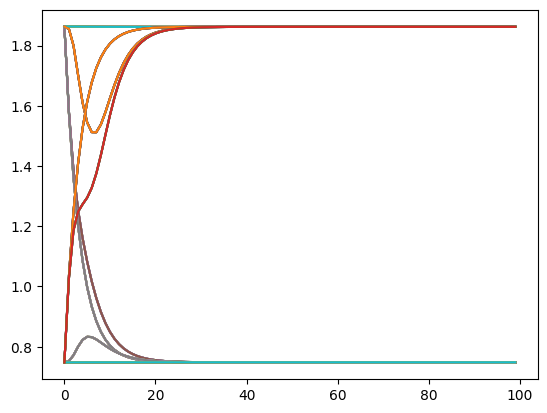

In [32]:
allx = list(itertools.product(*zip(xminus, xplus)))

for i in range(2**6):
    y = scipy.integrate.odeint(emt_scipy, allx[i], np.linspace(0,50,100))
    if i == 0:
        equilibria = np.array([[y[-1,:]]])
    else:
        equilibria = np.append(equilibria, y[-1,:])
    plt.plot(y[:,0])
    #plt.show()
plt.show()

In [13]:
eq = np.reshape(equilibria,[64, 6])
print(eq[3,:], '\n', np.array(allx)[42,:])
print(np.linalg.norm(eq[3,:] - np.array(allx)[42,:]))

[0.74811781 0.6635165  1.74287231 1.04103089 0.14528704 0.3395496 ] 
 [0.747605   0.66415025 1.74285774 1.04103089 0.14528704 0.3395496 ]
0.000815369665571946


In [11]:
print(emt(eq[3,:]), '\n', emt(np.array(allx)[42,:]))

[ 7.49459939e-11 -1.11022302e-16  2.62131317e-10 -5.08482145e-14
  1.82215354e-14 -4.99600361e-16] 
 [ 0.00000000e+00 -4.81040933e-04  0.00000000e+00  0.00000000e+00
  3.01925896e-05  0.00000000e+00]


In [29]:
print(eq[3,:], '\n', xminus, '\n', xplus)

[0.74811781 0.6635165  1.74287231 1.04103089 0.14528704 0.3395496 ] 
 [1.86343288 0.66415025 1.74482366 1.04103089 0.36625157 0.3395496 ] 
 [0.747605   0.6635165  1.74285774 0.41971846 0.14528704 0.3395496 ]
